<a href="https://colab.research.google.com/github/Anamika0606/CSE475_Machine-Learning/blob/main/lab/Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

# Load Dataset

In [28]:
!gdown --id 1Q6pdhzWFu2oegWMPvrOE8dWTra8FJsTf -O Mall_Customers.csv

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Q6pdhzWFu2oegWMPvrOE8dWTra8FJsTf
To: /content/Mall_Customers.csv
100% 3.98k/3.98k [00:00<00:00, 9.99MB/s]


In [5]:
df =  pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,False
Gender,False
Age,False
Annual Income (k$),False
Spending Score (1-100),False


In [7]:
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,False
Gender,False
Age,False
Annual Income (k$),False
Spending Score (1-100),False


## Praparing  dataset

In [8]:
df.info()
df.isnull().any()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,False
Gender,False
Age,False
Annual Income (k$),False
Spending Score (1-100),False


In [9]:
df = df.drop(columns=["CustomerID"])

# Removing CustomerID

In [10]:
df = pd.get_dummies(df, columns=["Gender"], drop_first=True)

In [12]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


Applying one-hot encoding because clustering algorithms used here requires numeric input.
They only work with numbers. In the printed df we can see the Gender is converted into boolean and boolean is already numeric in python.

# Normalization or Standardization

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

Normalizing features using StandardScaler (z-score normalization or standardization) so that all variables contribute equally to distance calculations and no feature dominates due to larger scale.

In [14]:
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

# Determine Optiaml K for K-Means using elbow method

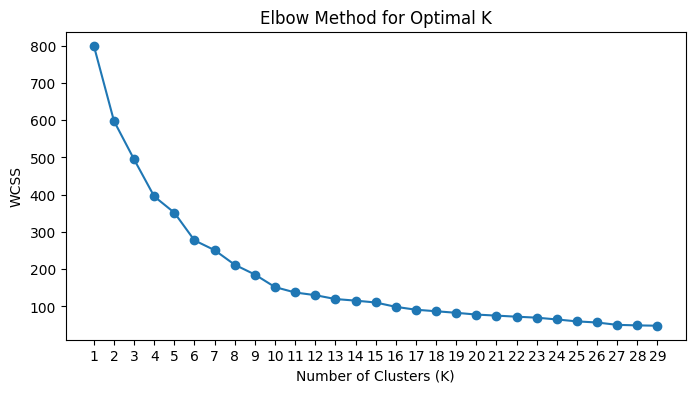

In [15]:
wcss = []
k_range = range(1, 30)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8,4))
plt.xticks(k_range)
plt.plot(k_range, wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

In [16]:
optimal_k = 11

From the elbow graph, a clear bend can be seen at K = 11. After this point, the decrease in WCSS becomes small. So, K = 11 is selected as the optimal number of clusters.

## Apply here K-Means

In [17]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Apply here DBSCAN

In [18]:
eps_values = range(1, 201)
min_samples_values = range(2, 20)

results = []

for eps_int in eps_values:
    eps = eps_int / 10

    for min_samples in min_samples_values:

        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters > 1:
            score = silhouette_score(scaled_data, labels)
        else:
            score = -1

        results.append({
            "eps": eps,
            "min_samples": min_samples,
            "clusters": n_clusters,
            "noise_points": n_noise,
            "silhouette": score
        })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(
    by=["silhouette","noise_points","min_samples","eps"],
    ascending=[False, False,True, True]
)

print(results_df.head(10))

     eps  min_samples  clusters  noise_points  silhouette
180  1.1            2         2             0    0.277604
198  1.2            2         2             0    0.277604
216  1.3            2         2             0    0.277604
234  1.4            2         2             0    0.277604
252  1.5            2         2             0    0.277604
270  1.6            2         2             0    0.277604
288  1.7            2         2             0    0.277604
306  1.8            2         2             0    0.277604
324  1.9            2         2             0    0.277604
342  2.0            2         2             0    0.277604


In [19]:
dbscan = DBSCAN(eps=1.1, min_samples=2)
dbscan_labels = dbscan.fit_predict(scaled_data)

determining optimal eps and min_samples for DBSAN via bruteforce and applying DBSCAN to the dataset

# Applying GMM


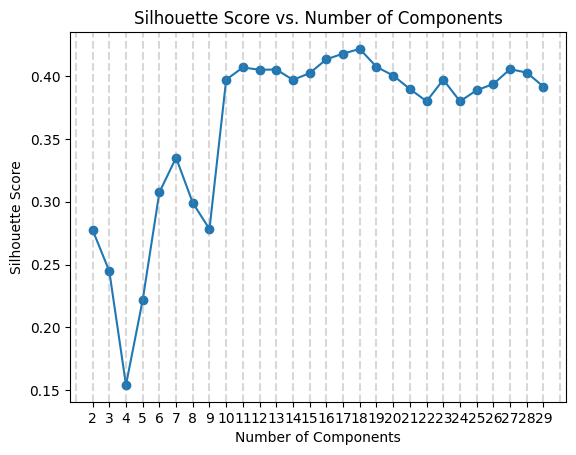

In [23]:
sil_scores = []
components = range(2, 30)
for k in components:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(scaled_data)
    if len(set(labels)) > 1:
        sil_scores.append(silhouette_score(scaled_data, labels))
    else:
        sil_scores.append(-1)

plt.plot(components, sil_scores, marker='o')
plt.xticks(components)

for x in range(1, 31):
    plt.axvline(x=x, color='gray', linestyle='--', alpha=0.3)
plt.title("Silhouette Score vs. Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Silhouette Score")
plt.show()

# Determine optimal number of components from silhouette scores
optimal_n_components_gmm = components[np.argmax(sil_scores)]

# Apply GMM with the optimal number of components
gmm = GaussianMixture(n_components=optimal_n_components_gmm, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)

Applying GMM after determining optimal n_components via bruteforce

# Evaluation

In [24]:
def evaluate(data, labels, name):
    if len(set(labels)) > 1:
        sil = silhouette_score(data, labels)
        dbi = davies_bouldin_score(data, labels)
        print(f"{name}")
        print(f"  Silhouette Score: {sil:.3f}")
        print(f"  Davies-Bouldin Index: {dbi:.3f}\n")
    else:
        print(f"{name}: Cannot compute metrics\n")

evaluate(scaled_data, kmeans_labels, "KMeans")
evaluate(scaled_data, dbscan_labels, "DBSCAN")
evaluate(scaled_data, gmm_labels, "GMM")

KMeans
  Silhouette Score: 0.428
  Davies-Bouldin Index: 0.842

DBSCAN
  Silhouette Score: 0.278
  Davies-Bouldin Index: 1.612

GMM
  Silhouette Score: 0.422
  Davies-Bouldin Index: 0.766



Based on Silhouette score (the higher the better) and DBI (the lower the better), KMeans performed best. GMM performed slightly lower than KMeans but still good. DBSCAN performed worst (low separation + high overlap)

## Apply PCA for visualization

In [25]:
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame({
    "PCA1": pca_result[:,0],
    "PCA2": pca_result[:,1],
    "KMeans": kmeans_labels,
    "DBSCAN": dbscan_labels,
    "GMM": gmm_labels
})

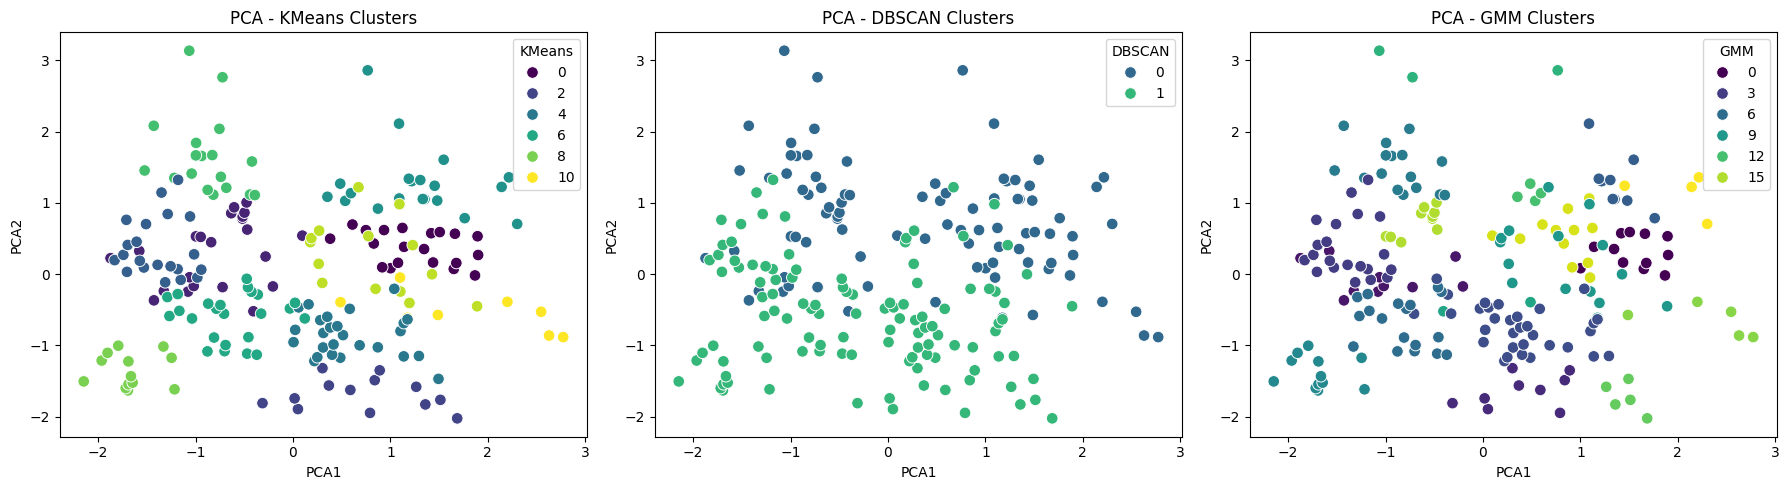

In [26]:
plt.figure(figsize=(18,5))

# KMeans
plt.subplot(1,3,1)
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2",
                hue="KMeans", palette="viridis", s=70)
plt.title("PCA - KMeans Clusters")

# DBSCAN
plt.subplot(1,3,2)
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2",
                hue="DBSCAN", palette="viridis", s=70)
plt.title("PCA - DBSCAN Clusters")

# GMM
plt.subplot(1,3,3)
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2",
                hue="GMM", palette="viridis", s=70)
plt.title("PCA - GMM Clusters")

plt.tight_layout()
plt.show()

KMeans - Clusters are moderately separated. Some overlap exists between nearby clusters. Clear grouping structure is visible.

DBSCAN - Only 2 clusters detected. Large grouping of points together. Less separation compared to KMeans and GMM.

GMM - Similar pattern to KMeans.

# Apply t-SNE

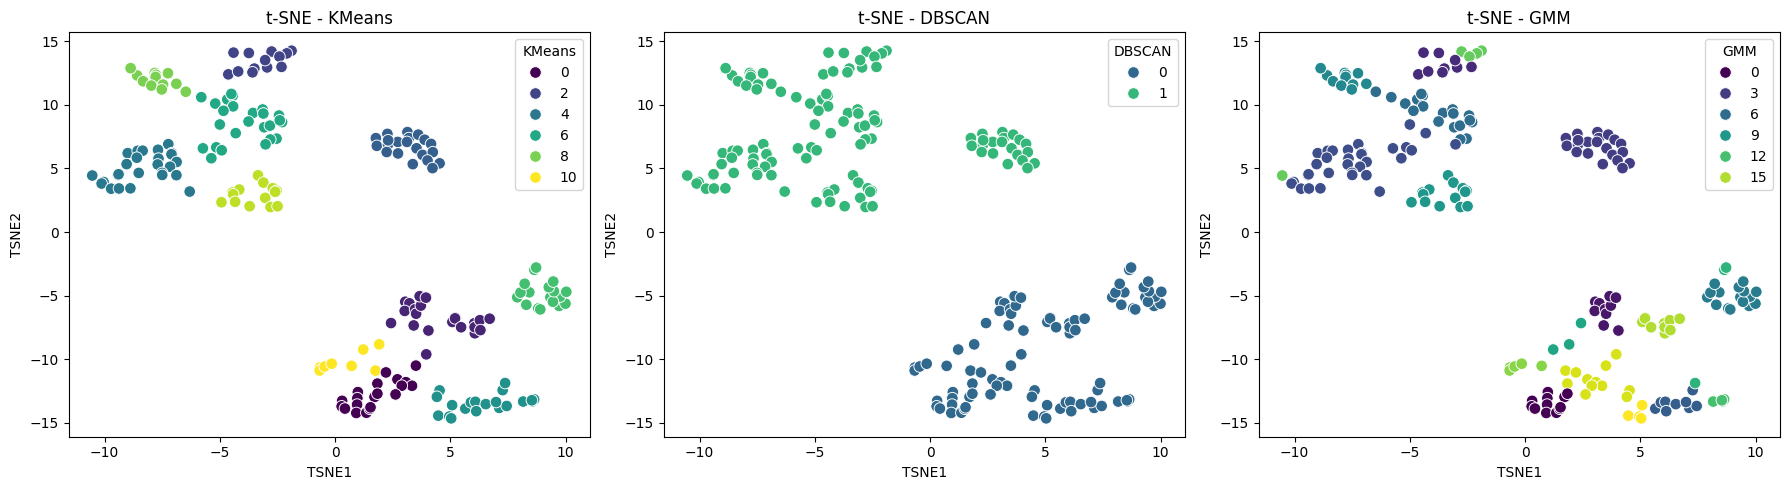

In [27]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(scaled_data)


tsne_df = pd.DataFrame({
    "TSNE1": tsne_result[:,0],
    "TSNE2": tsne_result[:,1],
    "KMeans": kmeans_labels,
    "DBSCAN": dbscan_labels,
    "GMM": gmm_labels
})


plt.figure(figsize=(18,5))

# KMeans
plt.subplot(1,3,1)
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2",
                hue="KMeans", palette="viridis", s=70)
plt.title("t-SNE - KMeans")

# DBSCAN
plt.subplot(1,3,2)
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2",
                hue="DBSCAN", palette="viridis", s=70)
plt.title("t-SNE - DBSCAN")

# GMM
plt.subplot(1,3,3)
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2",
                hue="GMM", palette="viridis", s=70)
plt.title("t-SNE - GMM")

plt.tight_layout()
plt.show()

t-SNE shows clearer clusters than PCA because it focuses on keeping nearby points close together, so similar data points stay grouped.

KMeans - Very clear and well-separated clusters. Distinct groups are visible. Strong cluster structure.

DBSCAN - Only 2 large clusters formed. Less detailed segmentation. Some structure ignored.

GMM - Similar to KMeans. Clear separation.